# 加载保存的帧数据进行分析

本notebook演示如何加载和分析从BLE Host应用程序保存的帧数据。

## 使用说明

1. 修改下面的 `filepath` 变量，指向您保存的JSON文件
2. 按顺序执行各个cell
3. 可以根据需要修改和扩展分析代码


In [13]:
# 导入必要的库
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 添加src目录到路径（从项目根目录运行）
project_root = Path().resolve()
if (project_root / 'src').exists():
    sys.path.insert(0, str(project_root / 'src'))
else:
    # 如果在examples目录中运行，需要向上一级
    project_root = project_root.parent
    sys.path.insert(0, str(project_root / 'src'))

try:
    from data_saver import DataSaver
    print("✓ 成功导入 data_saver 模块")
except ImportError as e:
    print(f"✗ 导入失败: {e}")
    print(f"当前工作目录: {os.getcwd()}")
    print(f"项目根目录: {project_root}")
    print(f"src路径: {project_root / 'src'}")


✓ 成功导入 data_saver 模块


## 1. 加载数据

请修改下面的文件路径，指向您保存的JSON文件。


In [14]:
# 设置要加载的文件路径
# 可以修改为您的文件路径，或使用相对路径
filepath = "C://Users//cwdbo//Downloads//frames_all_20251207_164401.json"  # 修改这里

# 如果文件不在当前目录，可以使用完整路径或相对路径
# filepath = "../data_exp/frames_all_20231206_120000.json"

# 检查文件是否存在
if not os.path.exists(filepath):
    print(f"⚠️  文件不存在: {filepath}")
    print(f"当前目录: {os.getcwd()}")
    print("\n请修改上面的 filepath 变量，指向正确的文件路径")
else:
    print(f"✓ 找到文件: {filepath}")
    print(f"文件大小: {os.path.getsize(filepath) / 1024 / 1024:.2f} MB")


✓ 找到文件: C://Users//cwdbo//Downloads//frames_all_20251207_164401.json
文件大小: 3.46 MB


In [15]:
# 加载数据
saver = DataSaver()
print(f"正在加载: {filepath}")

data = saver.load_frames(filepath)

if data is None:
    print("✗ 加载失败")
else:
    print("✓ 加载成功")
    frames = data.get('frames', [])
    print(f"✓ 共加载 {len(frames)} 帧数据")


正在加载: C://Users//cwdbo//Downloads//frames_all_20251207_164401.json
✓ 加载成功
✓ 共加载 112 帧数据


## 2. 查看文件信息


In [16]:
# 显示文件元数据
if data:
    print("=== 文件信息 ===")
    print(f"版本: {data.get('version', 'N/A')}")
    print(f"保存时间: {data.get('saved_at', 'N/A')}")
    print(f"原始总帧数: {data.get('total_frames', 0)}")
    print(f"保存的帧数: {data.get('saved_frames', 0)}")
    
    max_frames_param = data.get('max_frames_param')
    if max_frames_param is None:
        print(f"保存模式: 全部帧")
    else:
        print(f"保存模式: 最近 {max_frames_param} 帧")
    
    # 显示第一帧和最后一帧的信息
    if frames:
        print(f"\n第一帧: index={frames[0]['index']}, timestamp={frames[0]['timestamp_ms']} ms")
        print(f"最后一帧: index={frames[-1]['index']}, timestamp={frames[-1]['timestamp_ms']} ms")
        
        # 计算时间跨度
        time_span = (frames[-1]['timestamp_ms'] - frames[0]['timestamp_ms']) / 1000.0
        print(f"时间跨度: {time_span:.2f} 秒")
        
        # 计算平均帧率
        if len(frames) > 1:
            intervals = []
            for i in range(1, len(frames)):
                interval = (frames[i]['timestamp_ms'] - frames[i-1]['timestamp_ms']) / 1000.0
                intervals.append(interval)
            if intervals:
                avg_interval = np.mean(intervals)
                print(f"平均帧间隔: {avg_interval:.3f} 秒")
                print(f"平均帧率: {1.0/avg_interval:.2f} 帧/秒")


=== 文件信息 ===
版本: 1.0
保存时间: 2025-12-07T16:44:07.802887
原始总帧数: 112
保存的帧数: 112
保存模式: 全部帧

第一帧: index=0, timestamp=16384 ms
最后一帧: index=111, timestamp=75684 ms
时间跨度: 59.30 秒
平均帧间隔: 0.534 秒
平均帧率: 1.87 帧/秒


## 3. 查看第一帧的详细信息


In [17]:
# 查看第一帧的详细信息
if frames:
    first_frame = frames[0]
    print("=== 第一帧信息 ===")
    print(f"索引: {first_frame.get('index')}")
    print(f"时间戳: {first_frame.get('timestamp_ms')} ms")
    
    channels = first_frame.get('channels', {})
    print(f"通道数: {len(channels)}")
    
    # 显示前几个通道的数据
    if channels:
        print(f"\n前10个通道的数据示例:")
        print(f"{'通道':<6} {'幅值':<12} {'相位':<12} {'Local幅值':<12} {'Remote幅值':<12}")
        print("-" * 60)
        for ch in sorted(channels.keys())[:10]:
            ch_data = channels[ch]
            print(f"{ch:<6} {ch_data.get('amplitude', 0):<12.2f} "
                  f"{ch_data.get('phase', 0):<12.4f} "
                  f"{ch_data.get('local_amplitude', 0):<12.2f} "
                  f"{ch_data.get('remote_amplitude', 0):<12.2f}")


=== 第一帧信息 ===
索引: 0
时间戳: 16384 ms
通道数: 71

前10个通道的数据示例:
通道     幅值           相位           Local幅值      Remote幅值    
------------------------------------------------------------
0      288307.09    0.5710       558.40       516.31      
1      289064.37    0.4896       558.18       517.87      
10     231012.84    -0.6179      497.77       464.10      
11     220967.20    -0.7621      484.21       456.34      
12     209784.97    -0.8407      473.29       443.24      
13     198666.63    -0.9892      459.41       432.44      
14     185693.75    -1.0426      444.08       418.15      
15     173094.59    -1.0589      427.97       404.46      
16     163344.20    -1.1092      414.14       394.42      
18     150894.37    -1.1941      397.23       379.87      


## 4. 提取通道数据

选择一个通道，提取其所有帧的数据进行分析。


In [18]:
# 选择要分析的通道（可以修改）
channel = 0

# 首先检查哪些通道在数据中可用
if frames:
    all_channels = set()
    for frame in frames:
        all_channels.update(frame['channels'].keys())
    print(f"数据中可用的通道: {sorted(all_channels)[:20]}...")  # 只显示前20个
    print(f"总通道数: {len(all_channels)}")
    
    # 检查通道号类型并尝试匹配
    channel_found = False
    # 尝试整数和字符串两种类型
    channel_keys = [channel, str(channel), int(channel)]
    
    for ch_key in channel_keys:
        if ch_key in all_channels:
            channel = ch_key  # 使用找到的键
            channel_found = True
            print(f"✓ 找到通道: {ch_key} (类型: {type(ch_key).__name__})")
            break
    
    if not channel_found:
        print(f"⚠️  警告: 通道 {channel} 在数据中不存在")
        print(f"建议使用以下通道之一: {sorted(all_channels)[:10]}")
        # 使用第一个可用通道作为默认值
        if all_channels:
            channel = sorted(all_channels)[0]
            print(f"自动使用通道: {channel}")

# 提取该通道的所有数据
amplitudes = []
phases = []
local_amplitudes = []
remote_amplitudes = []
indices = []
timestamps_ms = []

for frame in frames:
    channels = frame['channels']
    # 尝试多种方式匹配通道
    ch_data = None
    if channel in channels:
        ch_data = channels[channel]
    elif str(channel) in channels:
        ch_data = channels[str(channel)]
    elif int(channel) in channels:
        ch_data = channels[int(channel)]
    
    if ch_data:
        amplitudes.append(ch_data['amplitude'])
        phases.append(ch_data['phase'])
        local_amplitudes.append(ch_data['local_amplitude'])
        remote_amplitudes.append(ch_data['remote_amplitude'])
        indices.append(frame['index'])
        timestamps_ms.append(frame['timestamp_ms'])

# 转换为numpy数组
amplitudes = np.array(amplitudes)
phases = np.array(phases)
local_amplitudes = np.array(local_amplitudes)
remote_amplitudes = np.array(remote_amplitudes)
indices = np.array(indices)
timestamps_ms = np.array(timestamps_ms)

print(f"\n✓ 提取通道 {channel} 的数据")
print(f"  数据点数: {len(amplitudes)}")

# 检查数据是否为空
if len(amplitudes) == 0:
    print("  ⚠️  警告: 没有提取到任何数据！")
    print("  可能的原因:")
    print("  1. 该通道在所有帧中都不存在")
    print("  2. 通道号类型不匹配（整数 vs 字符串）")
    print("  请检查上面的可用通道列表，并修改 channel 变量")
else:
    print(f"  幅值范围: {np.min(amplitudes):.2f} - {np.max(amplitudes):.2f}")
    print(f"  幅值均值: {np.mean(amplitudes):.2f}")
    print(f"  幅值标准差: {np.std(amplitudes):.2f}")


数据中可用的通道: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '24', '25', '26', '27', '28', '29']...
总通道数: 72
✓ 找到通道: 0 (类型: str)

✓ 提取通道 0 的数据
  数据点数: 112
  幅值范围: 232726.74 - 290837.36
  幅值均值: 282819.97
  幅值标准差: 8711.01


## 5. 数据可视化


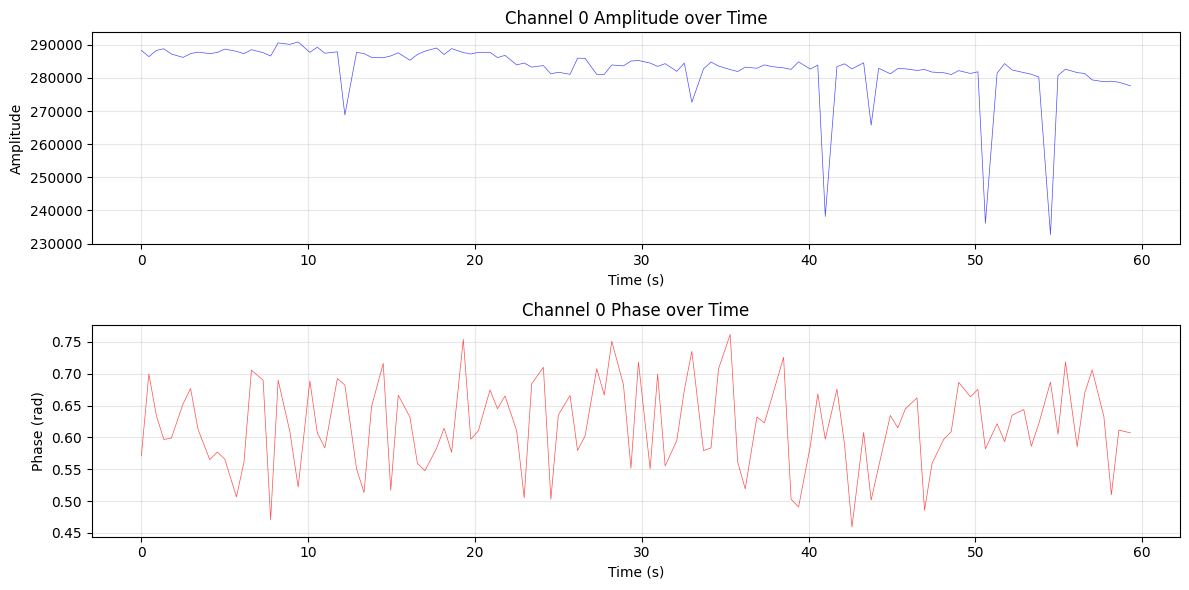

In [25]:
# 绘制幅值随时间的变化
if len(amplitudes) > 0:
    plt.figure(figsize=(12, 6))
    
    # 将时间戳转换为相对时间（秒）
    time_sec = (timestamps_ms - timestamps_ms[0]) / 1000.0
    
    plt.subplot(2, 1, 1)
    plt.plot(time_sec, amplitudes, 'b-', linewidth=0.5, alpha=0.7)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Channel {channel} Amplitude over Time')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 1, 2)
    plt.plot(time_sec, phases, 'r-', linewidth=0.5, alpha=0.7)
    plt.xlabel('Time (s)')
    plt.ylabel('Phase (rad)')
    plt.title(f'Channel {channel} Phase over Time')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  无法绘图: 没有数据可显示")


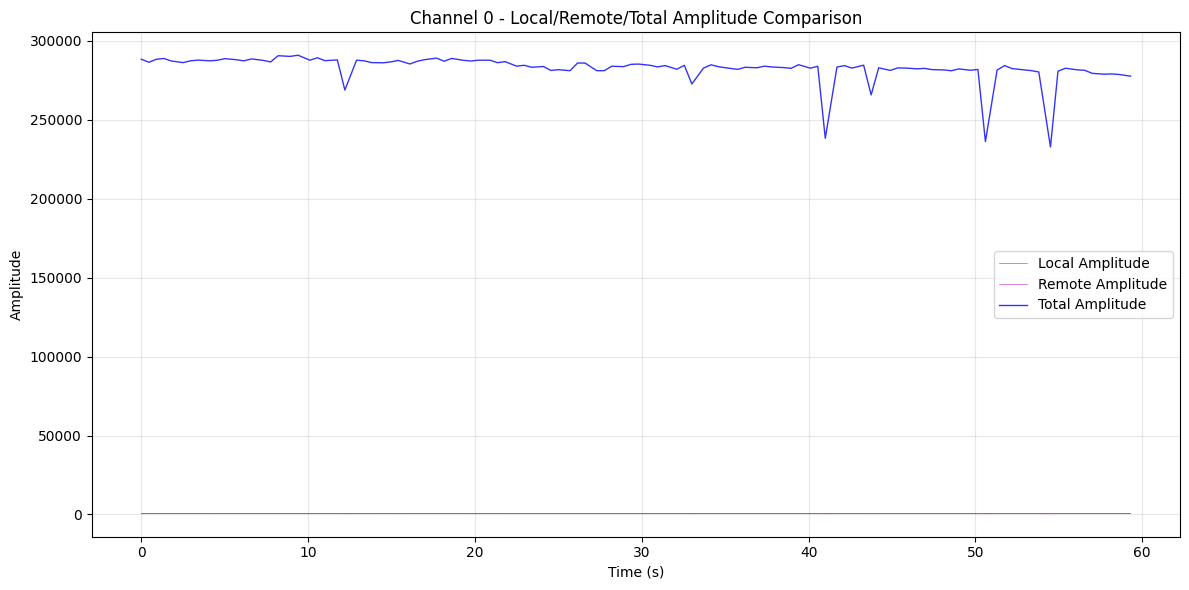

In [26]:
# 对比Local和Remote幅值
if len(amplitudes) > 0:
    plt.figure(figsize=(12, 6))
    
    # 将时间戳转换为相对时间（秒）
    time_sec = (timestamps_ms - timestamps_ms[0]) / 1000.0
    
    plt.plot(time_sec, local_amplitudes, 'g-', label='Local Amplitude', linewidth=0.5, alpha=0.7)
    plt.plot(time_sec, remote_amplitudes, 'm-', label='Remote Amplitude', linewidth=0.5, alpha=0.7)
    plt.plot(time_sec, amplitudes, 'b-', label='Total Amplitude', linewidth=1, alpha=0.8)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Channel {channel} - Local/Remote/Total Amplitude Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  无法绘图: 没有数据可显示")


## 6. 统计分析


In [21]:
# 计算统计信息
if len(amplitudes) > 0:
    print(f"=== 通道 {channel} 统计信息 ===")
    print(f"\n幅值统计:")
    print(f"  均值: {np.mean(amplitudes):.2f}")
    print(f"  标准差: {np.std(amplitudes):.2f}")
    print(f"  最大值: {np.max(amplitudes):.2f}")
    print(f"  最小值: {np.min(amplitudes):.2f}")
    print(f"  中位数: {np.median(amplitudes):.2f}")
    
    print(f"\n相位统计:")
    print(f"  均值: {np.mean(phases):.4f} rad ({np.degrees(np.mean(phases)):.2f}°)")
    print(f"  标准差: {np.std(phases):.4f} rad ({np.degrees(np.std(phases)):.2f}°)")
    print(f"  最大值: {np.max(phases):.4f} rad ({np.degrees(np.max(phases)):.2f}°)")
    print(f"  最小值: {np.min(phases):.4f} rad ({np.degrees(np.min(phases)):.2f}°)")
    
    print(f"\nLocal幅值统计:")
    print(f"  均值: {np.mean(local_amplitudes):.2f}")
    print(f"  标准差: {np.std(local_amplitudes):.2f}")
    
    print(f"\nRemote幅值统计:")
    print(f"  均值: {np.mean(remote_amplitudes):.2f}")
    print(f"  标准差: {np.std(remote_amplitudes):.2f}")
else:
    print("⚠️  无法计算统计信息: 没有数据")


=== 通道 0 统计信息 ===

幅值统计:
  均值: 282819.97
  标准差: 8711.01
  最大值: 290837.36
  最小值: 232726.74
  中位数: 283912.99

相位统计:
  均值: 0.6183 rad (35.43°)
  标准差: 0.0679 rad (3.89°)
  最大值: 0.7618 rad (43.65°)
  最小值: 0.4591 rad (26.30°)

Local幅值统计:
  均值: 554.44
  标准差: 4.05

Remote幅值统计:
  均值: 510.03
  标准差: 12.88


## 7. 频率分析（FFT）

使用FFT分析信号的频率成分。


采样率: 1.87 Hz
采样间隔: 0.534 秒

主频率: 0.0167 Hz (1.00 次/分钟)
主频率功率: 115327.94


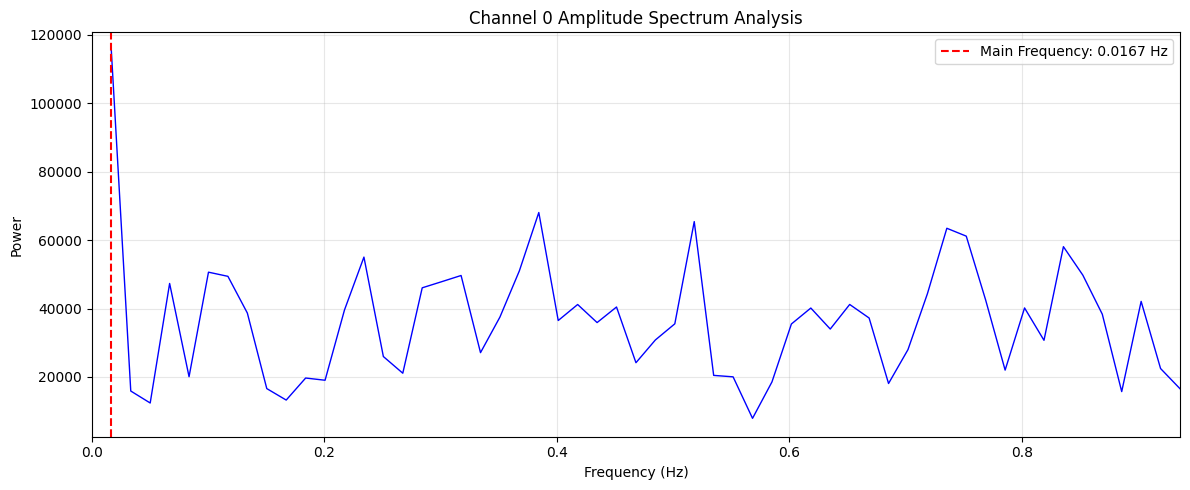

In [27]:
# 计算采样率
if len(timestamps_ms) > 1:
    dt = np.mean(np.diff(timestamps_ms)) / 1000.0  # 转换为秒
    sampling_rate = 1.0 / dt
    print(f"采样率: {sampling_rate:.2f} Hz")
    print(f"采样间隔: {dt:.3f} 秒")
else:
    print("数据点不足，无法计算采样率")
    dt = None
    sampling_rate = None

# 执行FFT
if len(amplitudes) > 4 and sampling_rate and dt > 0:
    # 去除直流成分
    amplitudes_dc_removed = amplitudes - np.mean(amplitudes)
    
    # 应用窗函数（汉明窗）
    window = np.hamming(len(amplitudes_dc_removed))
    amplitudes_windowed = amplitudes_dc_removed * window
    
    # FFT
    fft_vals = np.fft.rfft(amplitudes_windowed)
    fft_freq = np.fft.rfftfreq(len(amplitudes_windowed), dt)
    fft_power = np.abs(fft_vals)
    
    # 找到主频率
    if len(fft_power) > 1:
        main_freq_idx = np.argmax(fft_power[1:]) + 1  # 跳过DC成分
        main_freq = fft_freq[main_freq_idx]
        main_power = fft_power[main_freq_idx]
        
        print(f"\n主频率: {main_freq:.4f} Hz ({main_freq * 60:.2f} 次/分钟)")
        print(f"主频率功率: {main_power:.2f}")
        
        # 绘制频谱
        plt.figure(figsize=(12, 5))
        plt.plot(fft_freq[1:], fft_power[1:], 'b-', linewidth=1)
        plt.axvline(main_freq, color='r', linestyle='--', label=f'Main Frequency: {main_freq:.4f} Hz')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.title(f'Channel {channel} Amplitude Spectrum Analysis')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(0, min(10, fft_freq[-1]))  # 只显示0-10Hz范围
        plt.tight_layout()
        plt.show()
    else:
        print("FFT结果不足，无法分析")
else:
    print("数据点不足或采样率未知，无法进行FFT分析")


## 8. 多通道对比分析

可以同时分析多个通道的数据。


In [28]:
# 选择要对比的通道
channels_to_compare = [0, 1, 2, 3, 4]  # 可以修改

# 提取多个通道的数据
channel_data = {}
for ch in channels_to_compare:
    ch_amplitudes = []
    ch_timestamps = []
    
    for frame in frames:
        if ch in frame['channels']:
            ch_amplitudes.append(frame['channels'][ch]['amplitude'])
            ch_timestamps.append(frame['timestamp_ms'])
    
    if ch_amplitudes:
        channel_data[ch] = {
            'amplitudes': np.array(ch_amplitudes),
            'timestamps': np.array(ch_timestamps)
        }

# 绘制多通道对比图
if channel_data:
    plt.figure(figsize=(14, 6))
    
    for ch, data in channel_data.items():
        time_sec = (data['timestamps'] - data['timestamps'][0]) / 1000.0
        plt.plot(time_sec, data['amplitudes'], label=f'通道 {ch}', linewidth=0.8, alpha=0.7)
    
    plt.xlabel('时间 (秒)')
    plt.ylabel('幅值')
    plt.title('多通道幅值对比')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 显示各通道的统计信息
    print("\n=== 多通道统计对比 ===")
    print(f"{'通道':<6} {'均值':<12} {'标准差':<12} {'最大值':<12} {'最小值':<12}")
    print("-" * 50)
    for ch, data in channel_data.items():
        amps = data['amplitudes']
        print(f"{ch:<6} {np.mean(amps):<12.2f} {np.std(amps):<12.2f} "
              f"{np.max(amps):<12.2f} {np.min(amps):<12.2f}")
else:
    print("没有找到可用的通道数据")


没有找到可用的通道数据


## 9. 自定义分析

您可以在这里添加自己的分析代码。

### 数据访问方式

```python
# 访问所有帧
for frame in frames:
    index = frame['index']
    timestamp_ms = frame['timestamp_ms']
    channels = frame['channels']
    
    # 访问特定通道
    if 0 in channels:
        ch_data = channels[0]
        amplitude = ch_data['amplitude']
        phase = ch_data['phase']
        local_amplitude = ch_data['local_amplitude']
        remote_amplitude = ch_data['remote_amplitude']
        # ... 其他字段
```

### 可用的数据字段

每个通道包含以下字段：
- `amplitude`: 总幅值
- `phase`: 总相位（弧度）
- `I`: I分量
- `Q`: Q分量
- `local_amplitude`: Local幅值
- `local_phase`: Local相位（弧度）
- `remote_amplitude`: Remote幅值
- `remote_phase`: Remote相位（弧度）
- `il`, `ql`, `ir`, `qr`: 原始IQ数据


In [24]:
# 在这里添加您的自定义分析代码
# 例如：特定通道的详细分析、相关性分析、异常检测等

# 示例：查找幅值异常大的帧
if len(amplitudes) > 0:
    print("=== 查找幅值异常大的帧 ===")
    threshold = np.mean(amplitudes) + 3 * np.std(amplitudes)  # 3倍标准差
    outliers = []
    
    for i, frame in enumerate(frames):
        channels = frame['channels']
        # 尝试多种方式匹配通道
        ch_data = None
        if channel in channels:
            ch_data = channels[channel]
        elif str(channel) in channels:
            ch_data = channels[str(channel)]
        elif int(channel) in channels:
            ch_data = channels[int(channel)]
        
        if ch_data:
            amp = ch_data['amplitude']
            if amp > threshold:
                outliers.append({
                    'index': frame['index'],
                    'timestamp': frame['timestamp_ms'],
                    'amplitude': amp
                })
    
    if outliers:
        print(f"找到 {len(outliers)} 个异常帧（幅值 > {threshold:.2f}）:")
        for out in outliers[:10]:  # 只显示前10个
            print(f"  帧 {out['index']}: 时间戳={out['timestamp']} ms, 幅值={out['amplitude']:.2f}")
    else:
        print("未发现异常帧")
else:
    print("⚠️  无法进行分析: 没有数据")


=== 查找幅值异常大的帧 ===
未发现异常帧
